In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
json_path = 'C:\\Users\\lmmag\\LevelData\\raw\\district.json'
with open(json_path, 'r') as file:
    data = json.load(file)


##C:\Users\lmmag\LevelData\raw

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
print(type(data))
print(data.keys())

<class 'dict'>
dict_keys(['benchmarks', 'schools', 'courseSections', 'courseSectionRosters', 'scores'])


In [5]:
benchmarks = pd.DataFrame(data['benchmarks'])
schools = pd.DataFrame(data['schools'])
courseSections = pd.DataFrame(data['courseSections'])
courseSectionRosters = pd.DataFrame(data['courseSectionRosters'])
scores = pd.DataFrame(data['scores'])

In [6]:
print(type(benchmarks))

<class 'pandas.core.frame.DataFrame'>


Benchmarks

In [7]:
print(benchmarks.shape)
print(benchmarks.columns)


(42, 6)
Index(['id', 'districtId', 'year', 'level', 'dataSource', 'value'], dtype='object')


In [8]:
benchmarks.head(10)

,id,districtId,year,level,dataSource,value
0,120,45,2017,3,value_scantronMath,2356
1,121,45,2017,3,value_scantronReading,2563
2,122,45,2017,4,value_scantronMath,2493
3,123,45,2017,4,value_scantronReading,2674
4,124,45,2017,5,value_scantronMath,2584
5,125,45,2017,5,value_scantronReading,2841
6,126,45,2017,6,value_scantronMath,2675
7,127,45,2017,6,value_scantronReading,2897
8,128,45,2017,7,value_scantronMath,2766
9,129,45,2017,7,value_scantronReading,3008


In [9]:
benchmarks.nunique()

id            42
districtId     1
year           2
level          7
dataSource     9
value         35
dtype: int64

In [10]:
benchmarks.describe(include='all')

,id,districtId,year,level,dataSource,value
count,42,42,42,42,42,42
unique,42,1,2,7,9,35
top,120,45,2018,3,value_scantronMath,18
freq,1,42,29,6,12,3


In [11]:
level_list = benchmarks['level'].unique().tolist()
level_list

['3', '4', '5', '6', '7', '8', '11']

<Axes: ylabel='level'>

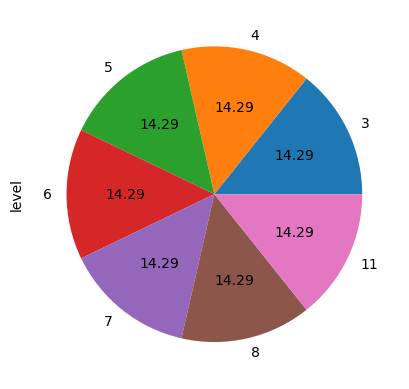

In [12]:
benchmarks['level'].value_counts().plot.pie(autopct='%.2f')

<Axes: ylabel='dataSource'>

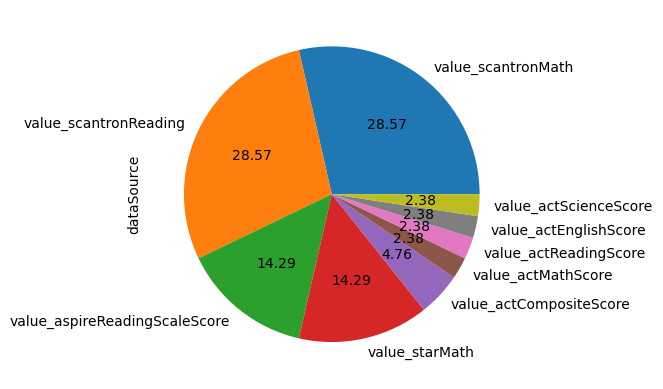

In [13]:
benchmarks['dataSource'].value_counts().plot.pie(autopct='%.2f')

In [14]:
benchmarks['level'].value_counts()

3     6
4     6
5     6
6     6
7     6
8     6
11    6
Name: level, dtype: int64

In [15]:
value_list = benchmarks['value'].unique().tolist()
value_list

['2356',
 '2563',
 '2493',
 '2674',
 '2584',
 '2841',
 '2675',
 '2897',
 '2766',
 '3008',
 '2823',
 '3063',
 '19.5',
 '2364',
 '2518',
 '250',
 '1900',
 '2488',
 '2678',
 '260',
 '2589',
 '2798',
 '270',
 '2667',
 '2883',
 '275',
 '2743',
 '2954',
 '280',
 '2788',
 '3019',
 '290',
 '19.1',
 '17',
 '18']

In [16]:
data_source_list = benchmarks['dataSource'].unique().tolist()
data_source_list

['value_scantronMath',
 'value_scantronReading',
 'value_actCompositeScore',
 'value_aspireReadingScaleScore',
 'value_starMath',
 'value_actMathScore',
 'value_actReadingScore',
 'value_actEnglishScore',
 'value_actScienceScore']

In [17]:
year_list = benchmarks['year'].unique().tolist()
year_list

['2017', '2018']

In [18]:
benchmarks['year'].value_counts()

2018    29
2017    13
Name: year, dtype: int64

Schools 

In [19]:
print(schools.shape)
print(schools.columns)

(20, 8)
Index(['id', 'name', 'districtId', 'costCenter', 'abbreviation',
       'acqRequestSelectable', 'oneRoster_sourcedId', 'oneRoster_ticketId'],
      dtype='object')


In [20]:
schools.head(10)

,id,name,districtId,costCenter,abbreviation,acqRequestSelectable,oneRoster_sourcedId,oneRoster_ticketId
0,222,Elementary A,45,5,EES,1,,0
1,223,Middle School A,45,8,EMS,1,,0
2,224,High School A,45,10,ECHS,1,,0
3,225,Junior High B,45,12,ECJH,1,,0
4,226,Elementary School B,45,18,HES,1,,0
5,227,Middle School C,45,19,HMS,1,,0
6,228,High School B,45,20,HHS,1,,0
7,229,Middle School D,45,23,MJH,1,,0
8,230,Elementary School C,45,30,RSE,1,,0
9,231,Elementary School D,45,35,CES,1,,0


In [21]:
schools.nunique()

id                      20
name                    20
districtId               1
costCenter              20
abbreviation            20
acqRequestSelectable     2
oneRoster_sourcedId      1
oneRoster_ticketId       1
dtype: int64

In [22]:
schools.describe(include='all')

,id,name,districtId,costCenter,abbreviation,acqRequestSelectable,oneRoster_sourcedId,oneRoster_ticketId
count,20,20,20,20,20,20,20,20
unique,20,20,1,20,20,2,1,1
top,222,Elementary A,45,5,EES,1,,0
freq,1,1,20,1,1,16,20,20


In [23]:
name_list = schools['name'].unique().tolist()
name_list

['Elementary A',
 'Middle School A',
 'High School A',
 'Junior High B',
 'Elementary School B',
 'Middle School C',
 'High School B',
 'Middle School D',
 'Elementary School C',
 'Elementary School D',
 'Intermediate School E',
 'High School C',
 'Elementary School E',
 'Elementary School F',
 'High School D',
 'Middle School F',
 'Junior High School G',
 'Instructional Services',
 'Instructional Support Services',
 'General and Administrative']

In [24]:
schools['name'] = (schools['name'].astype('string'))

In [25]:
cost_center_list = schools['costCenter'].unique().tolist()
cost_center_list

['5',
 '8',
 '10',
 '12',
 '18',
 '19',
 '20',
 '23',
 '30',
 '35',
 '42',
 '50',
 '62',
 '65',
 '70',
 '75',
 '80',
 '8100',
 '8200',
 '8600']

<Axes: ylabel='costCenter'>

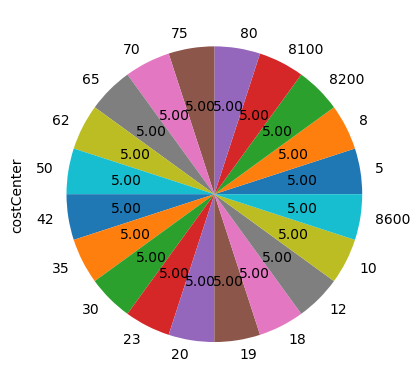

In [26]:
schools['costCenter'].value_counts().plot.pie(autopct='%.2f')

In [27]:
abbreviation_list = schools['abbreviation'].unique().tolist()
abbreviation_list


['EES',
 'EMS',
 'ECHS',
 'ECJH',
 'HES',
 'HMS',
 'HHS',
 'MJH',
 'RSE',
 'CES',
 'ARIS',
 'SEHS',
 'RES',
 'WES',
 'WHS',
 'WMS',
 'WJHS',
 'IS',
 'ISS',
 'GA']

Course Sections

In [28]:
print(courseSections.shape)
print(courseSections.columns)

(17662, 4)
Index(['id', 'vanityId', 'year', 'schoolId'], dtype='object')


In [29]:
courseSections['schoolId'] = pd.to_numeric(courseSections['schoolId'],errors='coerce').astype('int64')

In [30]:
courseSections.head(10)

,id,vanityId,year,schoolId
0,40388,PE 4,2015,222
1,40389,READING 4,2015,222
2,40390,HmroomPK6,2015,222
3,40391,LANGUAGE 4,2015,222
4,40392,SCIENCE 4,2015,222
5,40393,MATH 4,2015,222
6,40394,SOC ST 4,2015,222
7,40395,HmroomPK6,2015,222
8,40396,READING 4,2015,222
9,40397,MATH 4,2015,222


In [31]:
courseSections.groupby(["vanityId", "schoolId"]).count()

id  year
vanityId            schoolId           
21st Century        223         1     1
3-D Solid I         224         2     2
                    228         3     3
                    233         1     1
                    236         2     2
7 Habits            237         1     1
7 Habits 7-8        237         1     1
AAS:CBI             236         1     1
AAS:CBI-10          236         1     1
AAS:CBI-12          236         2     2
AAS:EngLA-10        233         4     4
                    236         4     4
AAS:EngLA-11        233         4     4
                    236         4     4
AAS:EngLA-12        233         4     4
                    236         4     4
AAS:EngLA-3         226         1     1
AAS:EngLA-4         226         1     1
AAS:EngLA-5         227         2     2
                    229         4     4
                    237         3     3
AAS:EngLA-6         227         1     1
                    229         5     5
                    237         2     2
AAS:EngLA-7         227         1     1
                    229         4     4
                    234         1     1
                    237         3     3
AAS:EngLA-8         227         2     2
                    229         4     4
                    237         4     4
AAS:EngLA-9         227         1     1
                    229         2     2
                    233         4     4
                    236         3     3
AAS:LISKILK6        226         3     3
                    237         3     3
AAS:LiSkilK6        226         1     1
                    227         2     2
                    237         1     1
AAS:Life-10         233         1     1
                    236         2     2
AAS:Life-11         233         1     1
                    236         4     4
AAS:Life-12         233         1     1
                    236         4     4
AAS:Life-7          227         1     1
                    229         3     3
                    234         1     1
                    237         3     3
AAS:Life-8          227         2     2
                    229         5     5
                    237         3     3
AAS:Life-9          227         1     1
                    233         1     1
                    236         3     3
AAS:Math-1          226         4     4
                    231         2     2
AAS:Math-10         233         4     4
                    236         4     4
AAS:Math-11         233         4     4
                    236         4     4
AAS:Math-12         233         4     4
                    236         5     5
AAS:Math-2          226         4     4
                    231         2     2
AAS:Math-3          226         5     5
                    232         4     4
AAS:Math-4          226         3     3
                    232         4     4
AAS:Math-5          227         2     2
                    229         4     4
                    237         3     3
AAS:Math-6          227         1     1
                    229         5     5
                    237         2     2
AAS:Math-7          227         1     1
                    229         3     3
                    234         1     1
                    237         3     3
AAS:Math-8          227         2     2
                    229         4     4
                    237         4     4
AAS:Math-9          227         1     1
                    229         2     2
                    233         4     4
                    236         3     3
AAS:Math-K          231         2     2
AAS:Read-1          226         4     4
                    231         2     2
AAS:Read-2          226         4     4
                    231         2     2
AAS:Read-3          226         5     5
                    232         4     4
AAS:Read-4          226         3     3
                    232         4     4
AAS:Read-K          231         2     2
AAS:Sci-10          233         4     4
                    236        

In [32]:
courseSections.nunique()

id          17662
vanityId     1047
year            4
schoolId       17
dtype: int64

In [33]:
courseSections.describe(include='all')

,id,vanityId,year,schoolId
count,17662,17662,17662,17662.000000
unique,17662,1047,4,NaN
top,40388,HOMEROOM,2017,NaN
freq,1,817,4664,NaN
mean,NaN,NaN,NaN,230.952610
std,NaN,NaN,NaN,4.520389
min,NaN,NaN,NaN,222.000000
25%,NaN,NaN,NaN,228.000000
50%,NaN,NaN,NaN,232.000000
75%,NaN,NaN,NaN,235.000000


<Axes: ylabel='schoolId'>

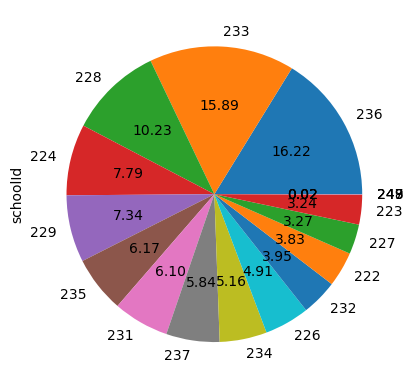

In [34]:
courseSections['schoolId'].value_counts().plot.pie(autopct= '%.2f')

<Axes: ylabel='year'>

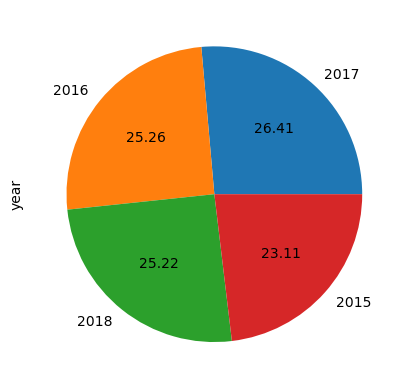

In [35]:
courseSections['year'].value_counts().plot.pie(autopct= '%.2f')

In [36]:
courseSections['year'].value_counts()

2017    4664
2016    4462
2018    4455
2015    4081
Name: year, dtype: int64

In [37]:
vanity_values = courseSections['vanityId'].unique().tolist()
vanity_values

['PE 4',
 'READING 4',
 'HmroomPK6',
 'LANGUAGE 4',
 'SCIENCE 4',
 'MATH 4',
 'SOC ST 4',
 'HOMEROOM',
 'READING 3',
 'LANGUAGE 3',
 'PE 3',
 'SOC ST 3',
 'SCIENCE 3',
 'MATH 3',
 'LANGUAGE 2',
 'SOC ST 2',
 'MATH 2',
 'READING 2',
 'SCIENCE 2',
 'PE 2',
 'LANGUAGE 1',
 'MATH 1',
 'READING 1',
 'SOC ST 1',
 'SCIENCE 1',
 'PE 1',
 'READING K',
 'PE K',
 'Schoolwide -222sID',
 'HWK-4',
 'StuHallPK6',
 'ELA IntPK-6',
 'Gifted',
 'Sp&Lang Imp',
 'EngNFlashK6',
 'Handwriting',
 'English LA 2',
 'SocialSciGr2',
 'English LA 4',
 'English LA 3',
 'SocialSciGr3',
 'English LA 1',
 'SocialSciGr1',
 'English LA K',
 'SocialSciGrK',
 'Phys Ed Gr 5',
 'English LA 5',
 'Math Grade 5',
 'Science Gr 5',
 'SocialStuGr5',
 'Algebra IH',
 'MathGrade 5',
 'STUDY HALL',
 'Eng 8 H/Adv',
 'Advisory 8',
 'CONTISS 7-8',
 'WLDHIS H/Adv',
 'CareerPrep-A',
 'PhySci8H/Adv',
 'PE 8',
 'PhySci Gr 8',
 'MATH8 PREALG',
 'English Gr 8',
 'WLDHIS 1500',
 'ContIssu 7-8',
 'StuAide7-8NC',
 'PE 5',
 'Math6H/Adv',
 'SciGr6

In [38]:
schoolId_list = courseSections['schoolId'].unique().tolist()
schoolId_list

[222,
 223,
 224,
 226,
 227,
 228,
 229,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 247,
 248,
 249]

In [39]:
courseSections['schoolId'].value_counts()

236    2864
233    2806
228    1806
224    1376
229    1297
235    1090
231    1078
237    1031
234     912
226     868
232     697
222     676
227     577
223     572
247       4
248       4
249       4
Name: schoolId, dtype: int64

<Axes: ylabel='schoolId'>

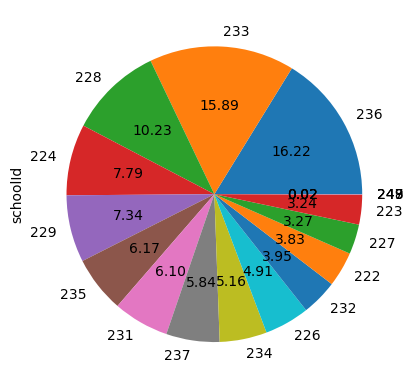

In [40]:
courseSections['schoolId'].value_counts().plot.pie(autopct= '%.2f')

In [41]:
courseSections['year'].unique()

array(['2015', '2017', '2016', '2018'], dtype=object)

In [42]:
val_year = courseSections['year'].value_counts()
print(val_year)

2017    4664
2016    4462
2018    4455
2015    4081
Name: year, dtype: int64


In [43]:
courseSections.dtypes

id          object
vanityId    object
year        object
schoolId     int64
dtype: object

Course Sections Rosters

In [44]:
print(courseSectionRosters.shape)
print(courseSectionRosters.columns)

(612241, 5)
Index(['id', 'courseSectionId', 'studentId', 'studentLevel', 'ticket'], dtype='object')


In [45]:
courseSectionRosters.head(10)

,id,courseSectionId,studentId,studentLevel,ticket
0,1047696,39975,45333,4,
1,1047704,39975,56116,4,
2,1047706,39975,45345,4,
3,1047715,39975,45400,4,
4,1047729,39975,45413,4,
5,1047738,39975,45429,4,
6,1047740,39975,56118,4,
7,1047746,39975,45438,4,
8,1047751,39975,45444,4,
9,1047752,39975,45445,4,


In [46]:
courseSectionRosters.nunique()

id                 612241
courseSectionId     17659
studentId           16867
studentLevel           17
ticket                  3
dtype: int64

In [47]:
courseSectionRosters.describe(include='all')

,id,courseSectionId,studentId,studentLevel,ticket
count,612241,612241,612241,612241,612241
unique,612241,17659,16867,17,3
top,1047696,63442,46126,10,
freq,1,72689,79,54246,610343


In [48]:
student_level_list = courseSectionRosters['studentLevel'].unique().tolist()
student_level_list

['4',
 '3',
 '2',
 '1',
 '0',
 '8',
 '5',
 '7',
 '6',
 '12',
 '10',
 '9',
 '11',
 '98',
 '99',
 '97',
 '96']

In [49]:
ticket = courseSectionRosters['ticket'].unique().tolist()
ticket

['', '0', 'RTI-Redville']

Scores

In [50]:
print(scores.shape)
print(scores.columns)

(34317, 71)
Index(['id', 'ticket', 'studentId', 'studentLevel', 'year',
       'measurementTypeId', 'subgroup_specialEd', 'subgroup_lunchStatus',
       'subgroup_gender', 'subgroup_ethnicity', 'subgroup_ell',
       'subgroup_bottom25', 'value_actMathScore', 'value_actEnglishScore',
       'value_actReadingScore', 'value_actScienceScore',
       'value_actCompositeScore', 'value_nweaMath', 'value_nweaReading',
       'value_nweaEnglish', 'value_iReadyMath', 'value_iReadyReading',
       'value_actMasteryComposite', 'value_actMasteryReading',
       'value_actMasteryMath', 'value_actMasteryScience',
       'value_actMasteryEnglish', 'value_nweaELA', 'value_scantronMath',
       'value_scantronReading', 'value_mapMath', 'value_mapEnglish',
       'value_mapReading', 'value_mapRLA', 'value_scantronScience',
       'value_scantronLanguage', 'value_ReadingFoundations',
       'value_scantronAlgebra', 'value_eocMath', 'value_actELAScore',
       'value_mapScience', 'value_LeapELAScale', 'va

In [51]:
scores.head(10)

,id,ticket,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,value_actMathScore,value_actEnglishScore,value_actReadingScore,value_actScienceScore,value_actCompositeScore,value_nweaMath,value_nweaReading,value_nweaEnglish,value_iReadyMath,value_iReadyReading,value_actMasteryComposite,value_actMasteryReading,value_actMasteryMath,value_actMasteryScience,value_actMasteryEnglish,value_nweaELA,value_scantronMath,value_scantronReading,value_mapMath,value_mapEnglish,value_mapReading,value_mapRLA,value_scantronScience,value_scantronLanguage,value_ReadingFoundations,value_scantronAlgebra,value_eocMath,value_actELAScore,value_mapScience,value_LeapELAScale,value_LeapMathScale,value_LeapALScale,value_LeapE2Scale,value_LeapGmScale,value_LeapBlScale,value_LeapE3Scale,value_LeapUsScale,value_E1Scale,value_UsEsScale,value_accessReadingScale,value_accessReadingProficiency,value_accessCompositeScale,value_accesscompositeProficiency,value_dibelsReading,value_mapHistory,value_LEAPSocSci,value_scantronGeometry,value_MathMilestones,value_ELAMilestones,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
0,115316,1530793427me3n202dz2,44774,8,2017,4,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,2808,2936,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,120482,1530793766nnbvcr456s,44774,8,2017,6,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,2841,2950,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,394052,1561150944dlvii7ak6r,44774,9,2018,6,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,115317,1530793427me3n202dz2,44775,8,2017,4,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,2580,2660,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,120483,1530793766nnbvcr456s,44775,8,2017,6,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,2705,2670,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,394212,1561150944dlvii7ak6r,44775,9,2018,6,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,115318,1530793427me3n202dz2,44776,8,2017,4,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,2193,2310,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,120484,1530793766nnbvcr456s,44776,8,2017,6,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,2335,2331,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,393831,1561150944dlvii7ak6r,44776,9,2018,6,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,115319,1530793427me3n202dz2,44777,6,2017,4,0,0,0,0,0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,2493,2766,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
scores.nunique()

id                                  34317
ticket                                 16
studentId                           12211
studentLevel                           17
year                                    3
measurementTypeId                       3
subgroup_specialEd                      2
subgroup_lunchStatus                    2
subgroup_gender                         1
subgroup_ethnicity                      1
subgroup_ell                            1
subgroup_bottom25                       2
value_actMathScore                     26
value_actEnglishScore                  34
value_actReadingScore                  34
value_actScienceScore                  32
value_actCompositeScore                29
value_nweaMath                          1
value_nweaReading                       1
value_nweaEnglish                       1
value_iReadyMath                        1
value_iReadyReading                     1
value_actMasteryComposite               1
value_actMasteryReading           

<Axes: ylabel='year'>

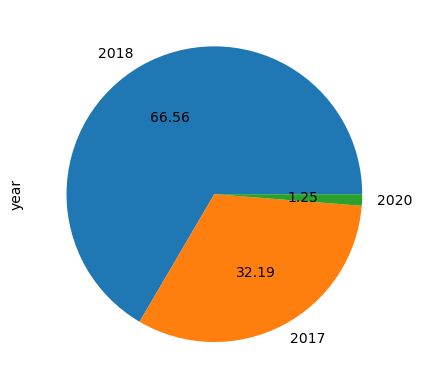

In [53]:
scores['year'].value_counts().plot.pie(autopct= '%.2f')

In [54]:
measure_typeID_list= scores['measurementTypeId'].unique().tolist()
measure_typeID_list

['4', '6', '5']

In [55]:
scores.describe(include='all')

,id,ticket,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,value_actMathScore,value_actEnglishScore,value_actReadingScore,value_actScienceScore,value_actCompositeScore,value_nweaMath,value_nweaReading,value_nweaEnglish,value_iReadyMath,value_iReadyReading,value_actMasteryComposite,value_actMasteryReading,value_actMasteryMath,value_actMasteryScience,value_actMasteryEnglish,value_nweaELA,value_scantronMath,value_scantronReading,value_mapMath,value_mapEnglish,value_mapReading,value_mapRLA,value_scantronScience,value_scantronLanguage,value_ReadingFoundations,value_scantronAlgebra,value_eocMath,value_actELAScore,value_mapScience,value_LeapELAScale,value_LeapMathScale,value_LeapALScale,value_LeapE2Scale,value_LeapGmScale,value_LeapBlScale,value_LeapE3Scale,value_LeapUsScale,value_E1Scale,value_UsEsScale,value_accessReadingScale,value_accessReadingProficiency,value_accessCompositeScale,value_accesscompositeProficiency,value_dibelsReading,value_mapHistory,value_LEAPSocSci,value_scantronGeometry,value_MathMilestones,value_ELAMilestones,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
count,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,33888,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317
unique,34317,16,12211,17,3,3,2,2,1,1,1,2,26,34,34,32,29,1,1,1,1,1,1,1,1,1,1,1,1429,1783,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1054,1,1,1,1,1,1,1,1
top,115316,drsccp8cnj,48102,7,2018,6,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,1,8104,6,4562,22842,17700,33449,25197,34317,34317,34317,29207,32186,32186,32187,32186,32187,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,8586,8738,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,24265,34317,34317,34317,34317,34317,34317,34317,34317


Concatenate Schools and course section 

In [56]:
schools_and_courseSection = pd.concat([schools,courseSections], axis=1)


In [57]:
schools_and_courseSection.head(17)

,id,name,districtId,costCenter,abbreviation,acqRequestSelectable,oneRoster_sourcedId,oneRoster_ticketId,id,vanityId,year,schoolId
0,222,Elementary A,45,5,EES,1,,0,40388,PE 4,2015,222
1,223,Middle School A,45,8,EMS,1,,0,40389,READING 4,2015,222
2,224,High School A,45,10,ECHS,1,,0,40390,HmroomPK6,2015,222
3,225,Junior High B,45,12,ECJH,1,,0,40391,LANGUAGE 4,2015,222
4,226,Elementary School B,45,18,HES,1,,0,40392,SCIENCE 4,2015,222
5,227,Middle School C,45,19,HMS,1,,0,40393,MATH 4,2015,222
6,228,High School B,45,20,HHS,1,,0,40394,SOC ST 4,2015,222
7,229,Middle School D,45,23,MJH,1,,0,40395,HmroomPK6,2015,222
8,230,Elementary School C,45,30,RSE,1,,0,40396,READING 4,2015,222
9,231,Elementary School D,45,35,CES,1,,0,40397,MATH 4,2015,222
